importing Modules

In [28]:
import pandas as pd
import numpy as np

Importing dataset

In [29]:
dataset=pd.read_excel("titanic3.xls")

EDA

In [ ]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
dataset.shape

(1309, 14)

In [ ]:
dataset=dataset.drop(columns=['name','cabin','boat','body','home.dest','ticket'])

In [ ]:
dataset.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [ ]:
dataset.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   str    
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   str    
dtypes: float64(2), int64(4), str(2)
memory usage: 81.9 KB


In [ ]:
dataset.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [ ]:
feature_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

In [ ]:
feature_with_nan

['age', 'fare', 'embarked']

In [ ]:
categorical_feature=[]
numerical_feature=[]
for feature in dataset.columns:
    if(dataset[feature].dtype=='int64' or dataset[feature].dtype=='float64'):
        numerical_feature.append(feature)
    if(dataset[feature].dtype=='object' or dataset[feature].dtype=='str'):
        categorical_feature.append(feature)

In [ ]:
print(numerical_feature)
print("Number of Numerical feature :",len(numerical_feature))

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']
Number of Numerical feature : 6


In [ ]:
print(categorical_feature)
print("Number of Categorical feature :",len(categorical_feature))

['sex', 'embarked']
Number of Categorical feature : 2


Exploring Categorical Features

In [ ]:
print(dataset['sex'].value_counts())

sex
male      843
female    466
Name: count, dtype: int64


In [ ]:
print(dataset['embarked'].value_counts())
print(dataset['embarked'].unique())

embarked
S    914
C    270
Q    123
Name: count, dtype: int64
<StringArray>
['S', 'C', nan, 'Q']
Length: 4, dtype: str


In [ ]:
# embarked has nan
feature_with_nan.append('embarked')

In [ ]:
print(dataset['pclass'].value_counts())
print(dataset['pclass'].unique())

pclass
3    709
1    323
2    277
Name: count, dtype: int64
[1 2 3]


In [ ]:
print(dataset['parch'].value_counts())

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64


In [ ]:
print(dataset['sibsp'].value_counts())

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='Count'>

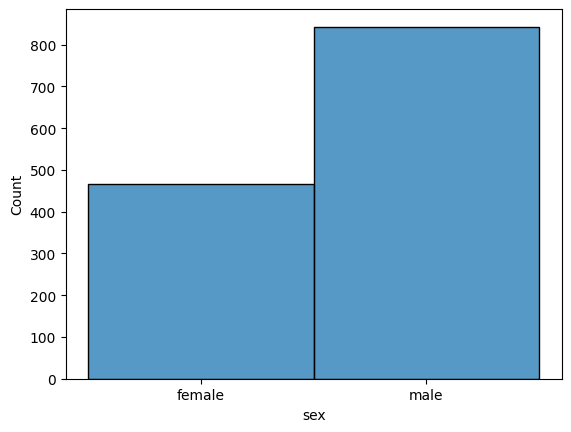

In [ ]:
import seaborn as sns
sns.histplot(data=dataset['sex'],multiple='layer')

<Axes: xlabel='embarked', ylabel='Count'>

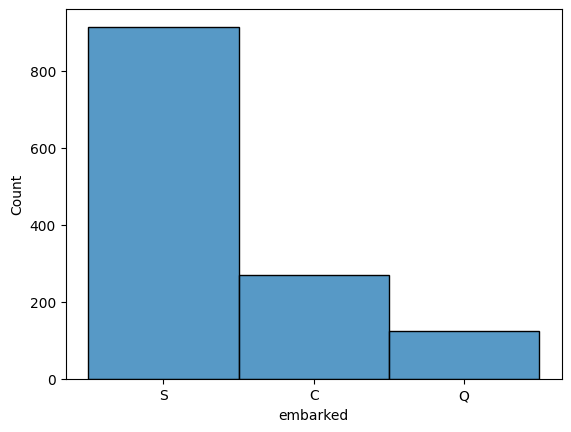

In [ ]:
sns.histplot(data=dataset['embarked'],multiple='layer')

<Axes: xlabel='sibsp', ylabel='Count'>

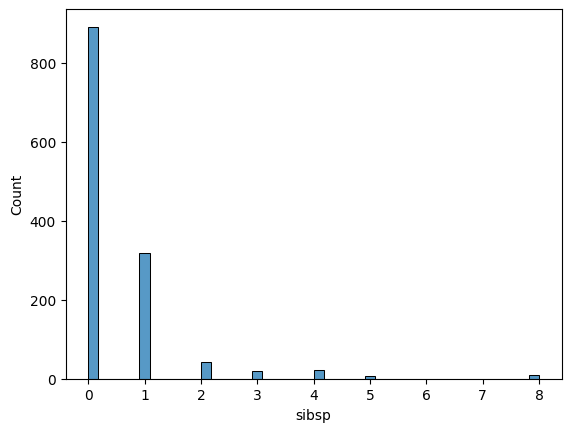

In [ ]:
sns.histplot(data=dataset['sibsp'],multiple='layer')

<Axes: xlabel='parch', ylabel='Count'>

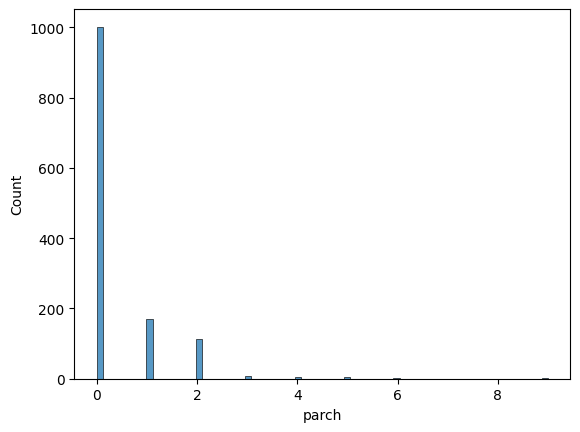

In [ ]:
sns.histplot(data=dataset['parch'],multiple='layer')

<Axes: xlabel='pclass', ylabel='Count'>

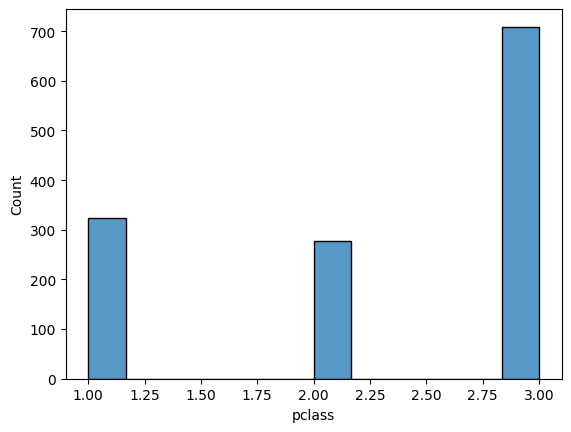

In [ ]:
sns.histplot(data=dataset['pclass'],multiple='layer')